In [4]:
import sys
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
from tqdm import tqdm
import pickle
from numpy.testing import assert_array_equal

sys.path.insert(0, '/Users/davide/Documents/Work/github/EEG/script/utils/')

from utils.plot_utils import plot_between_cond, plot_across_dur
from utils.load_stat_utils import get_data, reshape_data, get_boot_stats, get_peaks
from utils.stats_utils import get_boot_stats, get_peaks

plt.rcParams.update({
    'lines.linewidth': 2,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'legend.fontsize': 12,
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'grid.alpha': 0.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.edgecolor': 'black',
    'axes.linewidth': 2
})

ImportError: cannot import name 'plot_between_cond' from 'utils.plot_utils' (/Users/davide/Documents/Work/github/EEG/scripts/utils/plot_utils.py)

# Object decoding analyses

In [4]:
# load data
sub_to_use = [1,2,4,5]
diag_list = []

for s in sub_to_use:
    act_diag = get_data(str(s), 50, 0.1, 'fixed')  # 'random'  'random_separated_img'  'fixed'
    diag_list.append(act_diag)

# reshape
all_subj_con, all_subj_chal = reshape_data(diag_list)

# get bootstrapped means and CI
boot_mean_con, boot_mean_chal, boot_mean_diff, boot_CI_con, boot_CI_chal, boot_CI_diff = get_boot_stats(num_samples = 100)
    
# get peaks
avg_height_lat = get_peaks(boot_mean_con, boot_mean_chal)

duration: 2
0
10
20
30
40
50
60
70
80
90
100
110
duration: 6
0
10
20
30
40
50
60
70
80
90
100
110


## Plot object decoding

In [5]:
# plots

def plot_between_cond(): 
    
    # cond1 = train/test condition1 (a number between 0 and 3) typically 0 (Challenge)
    # cond2 = train/test condition2 (a number between 0 and 3) typically 3 (Control)
    
    durations = ['2', '6']
    durations_lab = ['34ms', '100ms']
    train_test_cond = ['chal', 'Cont-Chal', 'Chal-Cont', 'cont']
    x_fill = np.arange(len(boot_mean_con['2']))
    marker_size = 11
    
    for dur_idx,dur in enumerate(durations):
        plt.figure()
        plt.plot(boot_mean_con[dur], '-b',label=train_test_cond[3])
        plt.plot(avg_height_lat['con'][dur_idx][1], avg_height_lat['con'][dur_idx][0], marker='*', markersize= marker_size, color='b', markeredgecolor='black')
        plt.fill_between(x_fill, y1=boot_CI_con[dur][:,0], y2=boot_CI_con[dur][:,1], color='blue', alpha=.1)
        plt.plot(boot_mean_chal[dur], '-r', label=train_test_cond[0])
        plt.plot(avg_height_lat['chal'][dur_idx][1], avg_height_lat['chal'][dur_idx][0], marker='*', markersize= marker_size, color='r', markeredgecolor='black')
        plt.fill_between(x_fill, boot_CI_chal[dur][:,0], boot_CI_chal[dur][:,1], color= 'red', alpha=0.1)
        plt.plot(np.array(boot_mean_diff[dur])+.5, 'g-', linewidth=.5, label='difference')
        plt.fill_between(x_fill, y1=np.array(boot_CI_diff[dur][:,0]) + .5, y2=np.array(boot_CI_diff[dur][:,1]) +.5, color='green', alpha=.1)
        plt.ylim(.4, .9)

        # Add lines
        plt.axvline(x=10, color='gray', linestyle='--')
        plt.axhline(y=0.5, color='gray', linestyle='--')

        plt.xlabel('Time')
        plt.ylabel('Decoding Acc.')
        plt.xticks(np.linspace(0, 110, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'], rotation=45)
        plt.title('Object Decoding (' + durations_lab[dur_idx] + ')')
        plt.legend(loc='upper right')

        plt.show()
        

def plot_across_dur(): 
    
    # get difference
    con_diff = (np.array(boot_mean_con['6']) - np.array(boot_mean_con['2'])) + 0.5
    cha_diff = (np.array(boot_mean_chal['6']) - np.array(boot_mean_chal['2'])) + 0.5
    
    # initialize
    durations = ['2', '6']
    durations_lab = ['34ms', '100ms']
    x_fill = np.arange(len(boot_mean_con['2']))
    palette = sns.color_palette("tab10", len(durations))
    # palette_con = sns.color_palette("Blues", len(durations)+1)[::-1] 
    # palette_chal = sns.color_palette("Reds", len(durations)+1)[::-1] 
    palette_chal = [[103/255,0/255,13/255],[251/255,106/255,74/255]] #[203/255,24/255,29/255], [251/255,106/255,74/255], [252/255,187/255,161/255]]
    palette_con = [[8/255,48/255,107/255],[107/255,174/255,214/255]] #[33/255,113/255,181/255], [107/255,174/255,214/255], [198/255,209/255,239/255]]
    # palette_chal = ['#C72234','#EF5E25', '#EAB617']
    # palette_con = ['#3B1EEB','#237CF0', '#22C7C7']
    marker_size = 11
        
    # plot control
    plt.figure()
    plt.subplots(1,figsize=(6,5))
    for dur_idx, dur in enumerate(durations):

        plt.plot(boot_mean_con[dur], '-', label=str(durations_lab[dur_idx]), color=palette_con[dur_idx], zorder=1)
        plt.plot(avg_height_lat['con'][dur_idx][1], avg_height_lat['con'][dur_idx][0], marker='*', markersize= marker_size, color=palette_con[dur_idx], markeredgecolor='black', zorder=2)
        plt.fill_between(x_fill, y1=boot_CI_con[dur][:,0], y2=boot_CI_con[dur][:,1], alpha=.08, color=palette_con[dur_idx])
        if dur_idx == 0:
            plt.plot(con_diff, 'g-', linewidth=.5)
        else:
            plt.plot(con_diff, 'g-', linewidth=.5, label='difference')

        # Add lines (inside the loop for each subplot)
        plt.axvline(x=10, color='gray', linestyle='--')
        plt.axhline(y=0.5, color='gray', linestyle='--')
        plt.xticks(np.linspace(0, 110, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'], rotation=45)
        #ax[cond].set_xticks(np.linspace(0, 110, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'])

        plt.xlabel('Time')
        plt.ylabel('Decoding Accuracy')
        plt.tick_params(axis='y')
        plt.ylim(.4,.9)
        #plt.title('Object Decoding (Challenge)')  # Display the condition name
        plt.legend(loc='upper right', frameon=False, labelspacing=.3)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
    
    # plot challenge
    
    plt.figure()
    plt.subplots(1,figsize=(6,5))
    for dur_idx, dur in enumerate(durations):
        plt.plot(boot_mean_chal[dur], '-', label=str(durations_lab[dur_idx]), color=palette_chal[dur_idx], zorder=1)
        plt.plot(avg_height_lat['chal'][dur_idx][1], avg_height_lat['chal'][dur_idx][0], marker='*', markersize= marker_size, color=palette_chal[dur_idx], markeredgecolor='black', zorder=2)
        plt.fill_between(x_fill, y1=boot_CI_chal[dur][:,0], y2=boot_CI_chal[dur][:,1], alpha=.08, color=palette_chal[dur_idx])
        if dur_idx == 0:
            plt.plot(cha_diff, 'g-', linewidth=.5)
        else:
            plt.plot(cha_diff, 'g-', linewidth=.5, label='difference')

        # Add lines (inside the loop for each subplot)
        plt.axvline(x=10, color='gray', linestyle='--')
        plt.axhline(y=0.5, color='gray', linestyle='--')
        plt.xticks(np.linspace(0, 110, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'], rotation=45)
        #ax[cond].set_xticks(np.linspace(0, 110, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'])

        plt.xlabel('Time')
        plt.ylabel('Decoding Accuracy')
        plt.ylim(.4,.9)
        #plt.title('Object Decoding (Challenge)')  # Display the condition name
        plt.legend(loc='upper right', frameon=False, labelspacing=.3)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
        

def plot_all():
    
    durations = ['2', '6']
    durations_lab = ['34ms', '100ms']
    train_test_cond = ['Chal-Chal', 'Cont-Chal', 'Chal-Cont', 'Cont-Cont']
    palette_chal = [[103/255,0/255,13/255],[251/255,106/255,74/255]] #[203/255,24/255,29/255], [251/255,106/255,74/255], [252/255,187/255,161/255]]
    palette_con = [[8/255,48/255,107/255],[107/255,174/255,214/255]] #[33/255,113/255,181/255], [107/255,174/255,214/255], [198/255,209/255,239/255]]
    x_fill = np.arange(len(boot_mean_con['2']))
    marker_size = 7
    plt.figure(figsize=(7,6))
    
    for dur_idx,dur in enumerate(durations):
        plt.plot(boot_mean_con[dur], '-b',  color= palette_con[dur_idx], label= durations_lab[dur_idx])
        #plt.plot(avg_height_lat['con'][dur_idx][1], avg_height_lat['con'][dur_idx][0], marker='*', markersize= marker_size, color='b')
        #plt.fill_between(x_fill, y1=boot_CI_con[dur][:,0], y2=boot_CI_con[dur][:,1], color='blue', alpha=.1)
        plt.plot(boot_mean_chal[dur], '-r', color= palette_chal[dur_idx], label= durations_lab[dur_idx])
        #plt.plot(avg_height_lat['chal'][dur_idx][1], avg_height_lat['chal'][dur_idx][0], marker='*', markersize= marker_size, color='r')
        #plt.fill_between(x_fill, boot_CI_chal[dur][:,0], boot_CI_chal[dur][:,1], color= 'red', alpha=0.1)
        #plt.fill_between(x_fill, y1=np.array(boot_CI_diff[dur][:,0]) + .5, y2=np.array(boot_CI_diff[dur][:,1]) +.5, color='green', alpha=.1)
        plt.ylim(.4, .9)

        # Add lines
        plt.axvline(x=10, color='gray', linestyle='--')
        plt.axhline(y=0.5, color='gray', linestyle='--')

        plt.xlabel('Time')
        plt.ylabel('Decoding Acc.')
        plt.xticks(np.linspace(0, 110, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'], rotation=45)
        plt.title('Object Decoding (' + durations_lab[dur_idx] + ')')
        plt.legend(loc='upper right')

    plt.show()

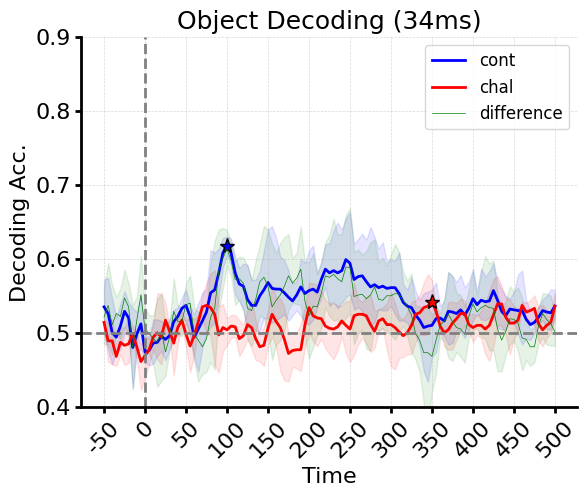

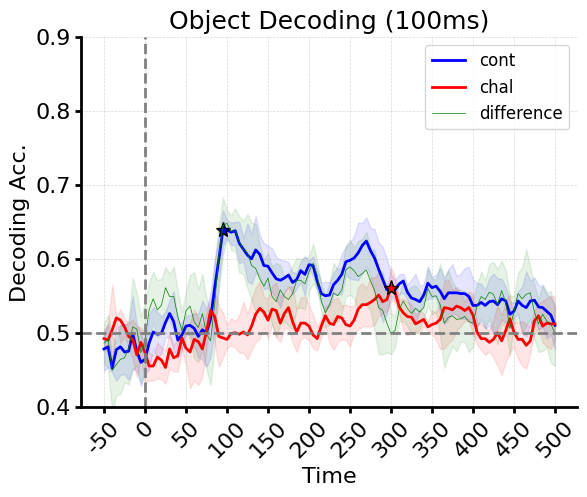

<Figure size 640x480 with 0 Axes>

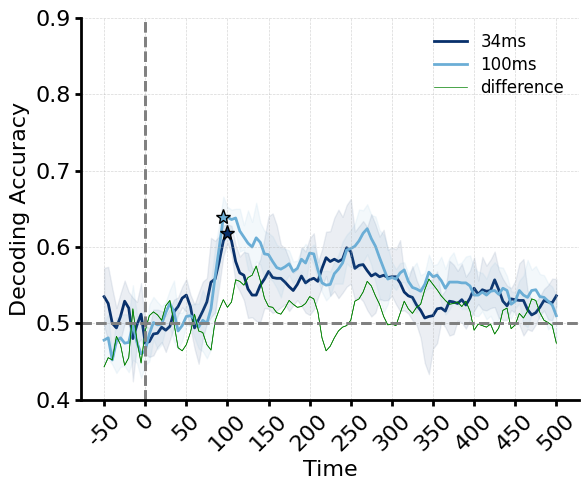

<Figure size 640x480 with 0 Axes>

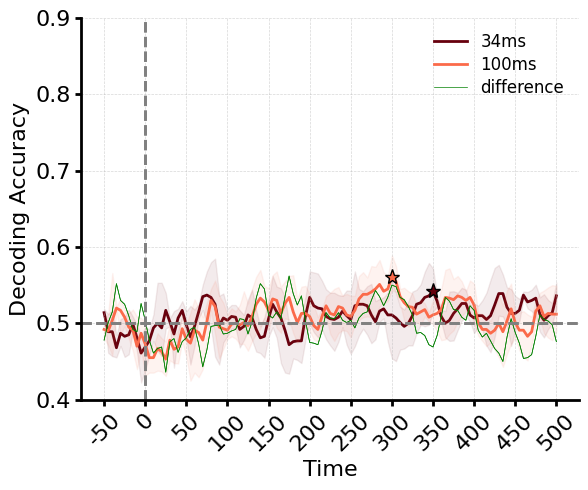

/localscratch/tmp/panzad87/tmp.18939209.0/ipykernel_638580/333865158.py:128: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(boot_mean_con[dur], '-b',  color= palette_con[dur_idx], label= durations_lab[dur_idx])
/localscratch/tmp/panzad87/tmp.18939209.0/ipykernel_638580/333865158.py:131: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(boot_mean_chal[dur], '-r', color= palette_chal[dur_idx], label= durations_lab[dur_idx])
/localscratch/tmp/panzad87/tmp.18939209.0/ipykernel_638580/333865158.py:128: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(boot_mean_con[dur], '-b',  color= palette_con[dur_idx], label= durations_lab[dur_idx])
/lo

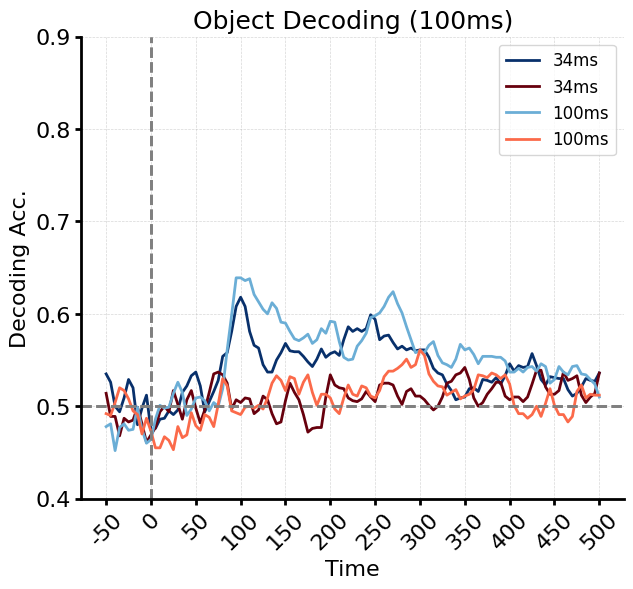

In [6]:
plot_between_cond()
plot_across_dur()
plot_all()

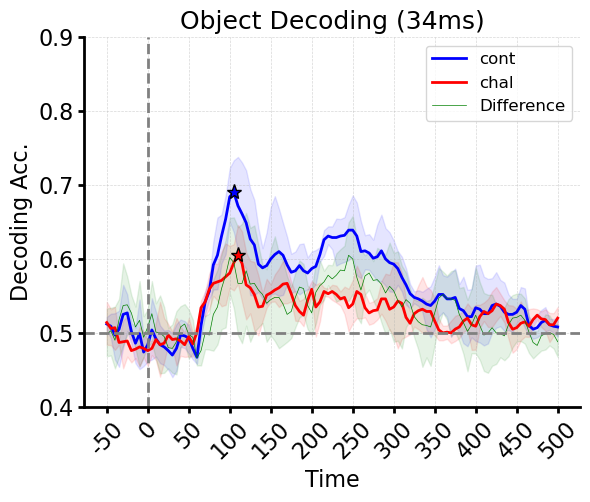

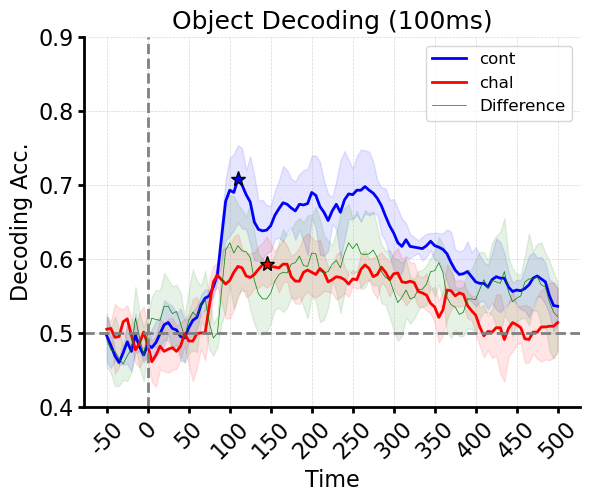

<Figure size 640x480 with 0 Axes>

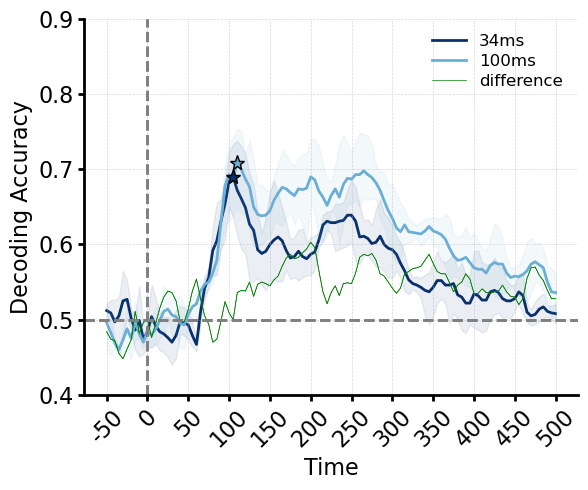

<Figure size 640x480 with 0 Axes>

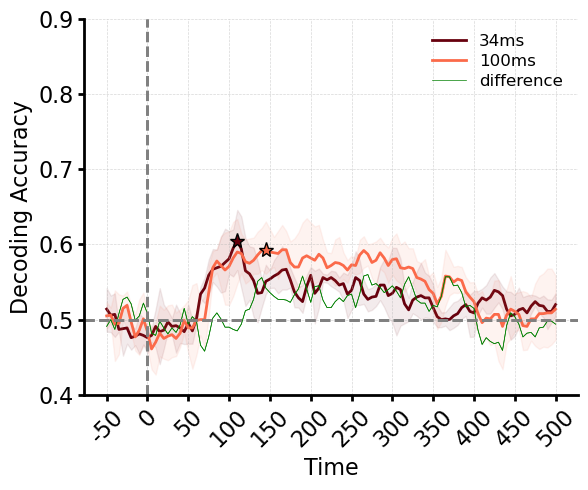

/localscratch/tmp/panzad87/tmp.18773307.0/ipykernel_87543/546707433.py:128: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(boot_mean_con[dur], '-b',  color= palette_con[dur_idx], label= durations_lab[dur_idx])
/localscratch/tmp/panzad87/tmp.18773307.0/ipykernel_87543/546707433.py:131: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(boot_mean_chal[dur], '-r', color= palette_chal[dur_idx], label= durations_lab[dur_idx])


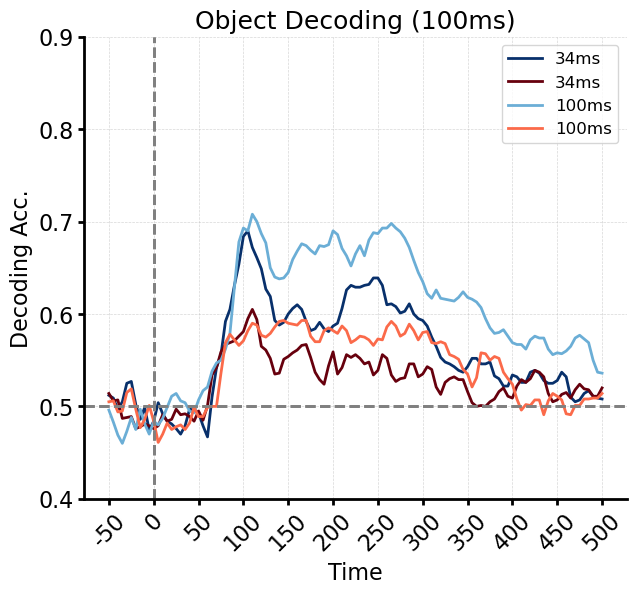

In [10]:
plot_between_cond()
plot_across_dur()
plot_all()

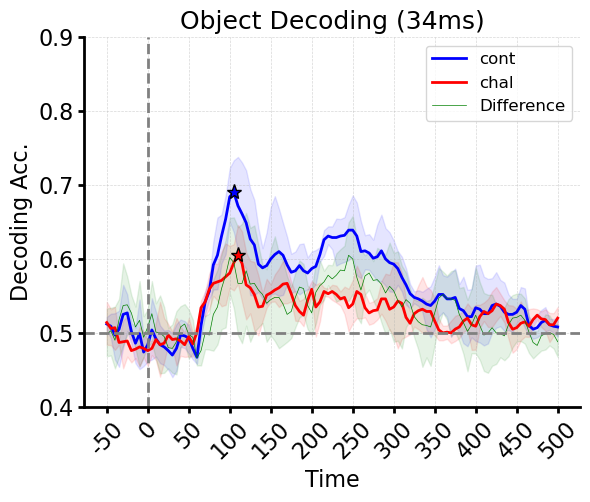

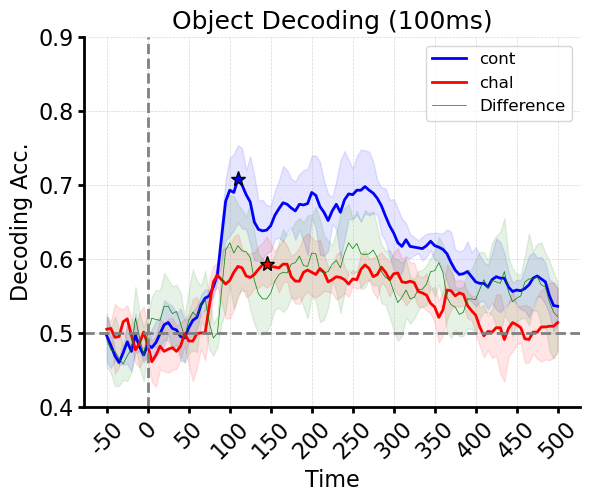

<Figure size 640x480 with 0 Axes>

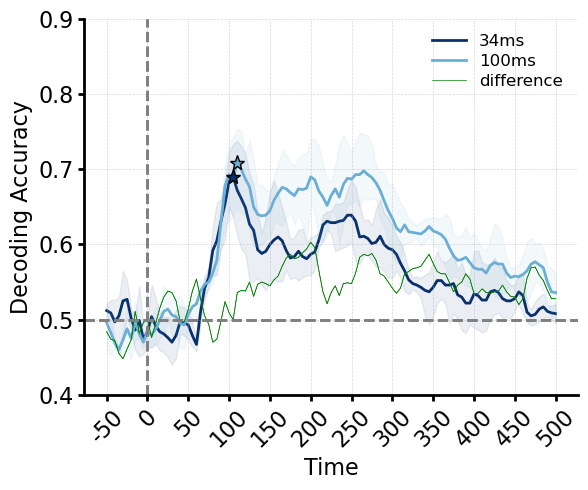

<Figure size 640x480 with 0 Axes>

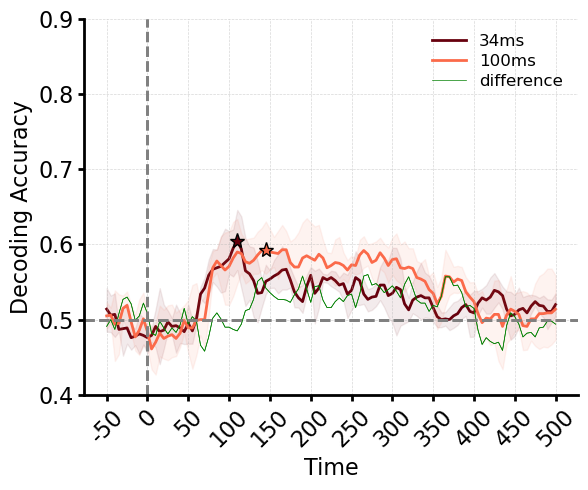

/localscratch/tmp/panzad87/tmp.18773307.0/ipykernel_87543/546707433.py:128: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  plt.plot(boot_mean_con[dur], '-b',  color= palette_con[dur_idx], label= durations_lab[dur_idx])
/localscratch/tmp/panzad87/tmp.18773307.0/ipykernel_87543/546707433.py:131: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(boot_mean_chal[dur], '-r', color= palette_chal[dur_idx], label= durations_lab[dur_idx])


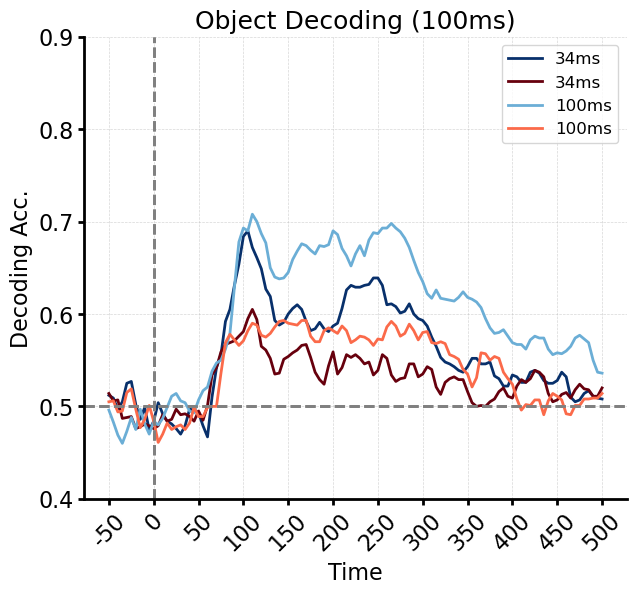

In [10]:
plot_between_cond()
plot_across_dur()
plot_all()

## Plot the decoding peaks (by subject)

In [4]:
# get the data

subj = ['88', '90', '92', '93', '95']
durations = ['2', '4', '6']
peaks_con = {'2':np.zeros((2,5)), '4':np.zeros((2,5)), '6':np.zeros((2,5))} 
peaks_chal = {'2':np.zeros((2,5)), '4':np.zeros((2,5)), '6':np.zeros((2,5))} 

for sub_idx,sub in enumerate(subj):
    # the dict with the peaks are organized by subj. For ech subj there are three list referring to the three durations (respectively, 2, 4, and 6)
    # in those list, the first value refers to the peak height, the second to the peak delay
    
    for dur in durations:
    
        # get the data from the actual sub
        diag_sub = get_data(sub)

        # get peak height and peak latency
        height_con = np.round(np.max(diag_sub[dur][3]),3)
        height_chal = np.round(np.max(diag_sub[dur][0]),3)
        lat_con = np.where(diag_sub[dur][3] == np.max(diag_sub[dur][3]))[0][0]
        lat_chal = np.where(diag_sub[dur][0] == np.max(diag_sub[dur][0]))[0][0]
        
        # store
        peaks_con[dur][0,sub_idx] = height_con; peaks_con[dur][1,sub_idx] = lat_con
        peaks_chal[dur][0,sub_idx] = height_chal; peaks_chal[dur][1,sub_idx] = lat_chal
    

In [16]:
durations = ['2', '4', '6']
for dur in durations:
    print(np.round(np.mean(peaks_con[dur][1]),3))
    print(np.round(np.mean(peaks_chal[dur][1]),3))

44.4
48.4
51.8
55.6
50.6
63.6


<Figure size 640x480 with 0 Axes>

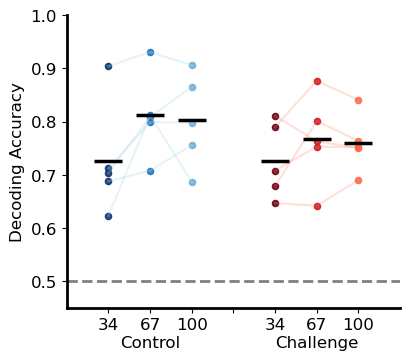

<Figure size 640x480 with 0 Axes>

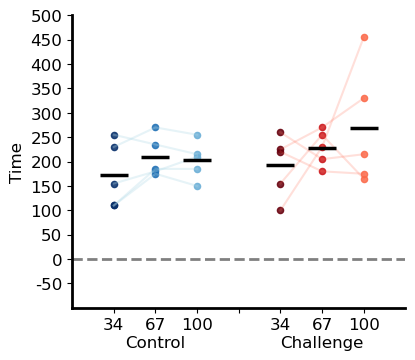

In [59]:
# palette_con = sns.color_palette("Blues", len(durations)+1)[::-1] 
# palette_chal = sns.color_palette("Reds", len(durations)+1)[::-1] 
palette_chal = [[103/255,0/255,13/255],[203/255,24/255,29/255], [251/255,106/255,74/255], [252/255,187/255,161/255]]
palette_con = [[8/255,48/255,107/255],[33/255,113/255,181/255], [107/255,174/255,214/255], [198/255,209/255,239/255]]
# palette_chal = ['#C72234','#EF5E25', '#EAB617']
# palette_con = ['#3B1EEB','#237CF0', '#22C7C7']

durations = ['2', '4', '6']
size =20
markeredgewidth=2.5
plt.figure()
plt.subplots(1,figsize=(4.3,3.8))
xs = [1,2,3]

for sub in range(5):
    con_points = [np.mean(peaks_con['2'][0][sub]), np.mean(peaks_con['4'][0][sub]), np.mean(peaks_con['6'][0][sub])]
    chal_points = [np.mean(peaks_chal['2'][0][sub]), np.mean(peaks_chal['4'][0][sub]), np.mean(peaks_chal['6'][0][sub])]

    # Connect the dots with lines for Control
    plt.plot(xs, con_points, '-', color='lightblue', alpha=0.3, zorder=2)

    # Connect the dots with lines for Challenge
    plt.plot([x + 4 for x in xs], chal_points, color='tomato', alpha=0.2, zorder=2)

# Scatter and plot points for each duration
for dur_idx, dur in enumerate(durations):
    plt.scatter([xs[dur_idx]]*5, peaks_con[dur][0], s=size, color=palette_con[dur_idx], alpha=.85, zorder=1, edgecolors='face')
    plt.plot(xs[dur_idx], np.mean(peaks_con[dur][0]), marker='_', markersize=20, markeredgewidth=markeredgewidth, color='black')
    plt.scatter([xs[dur_idx]+4]*5, peaks_chal[dur][0], s=size, color=palette_chal[dur_idx], alpha=.85, zorder=1, edgecolors='face')
    plt.plot(xs[dur_idx] + 4, np.mean(peaks_chal[dur][0]), marker='_', markersize=20, markeredgewidth=markeredgewidth, color='black')



    
plt.xlim(0,8)
plt.xticks(np.arange(1,8), ['34','67\nControl','100','','34','67\nChallenge','100'], fontsize=12)
plt.axhline(y=.5, linestyle='--', color='grey', linewidth=2)
plt.ylim(.45,1)
#plt.xlabel('Presentation Time')
plt.ylabel('Decoding Accuracy', fontsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.title('Decoding Peak\' Latency')
plt.show()
# plt.title('Decoding Peaks\' Amplitude')
    
    
# plot latency
size =20
markeredgewidth=2.5
plt.figure()
plt.subplots(1,figsize=(4.3,3.8))
xs = [1,2,3]

for sub in range(5):
    con_points = [np.mean(peaks_con['2'][1][sub]), np.mean(peaks_con['4'][1][sub]), np.mean(peaks_con['6'][1][sub])]
    chal_points = [np.mean(peaks_chal['2'][1][sub]), np.mean(peaks_chal['4'][1][sub]), np.mean(peaks_chal['6'][1][sub])]

    # Connect the dots with lines for Control
    plt.plot(xs, con_points, '-', color='lightblue', alpha=0.3, zorder=2)

    # Connect the dots with lines for Challenge
    plt.plot([x + 4 for x in xs], chal_points, color='tomato', alpha=0.2, zorder=2)
    
for dur_idx,dur in enumerate(durations):
    plt.scatter([xs[dur_idx]]*5, peaks_con[dur][1], s=size, color=palette_con[dur_idx], alpha=.85, edgecolors='face')
    plt.plot(xs[dur_idx], np.mean(peaks_con[dur][1]), marker='_', markersize= 20, markeredgewidth=markeredgewidth, color='black')
    plt.scatter([xs[dur_idx]+4]*5, peaks_chal[dur][1], s=size, color=palette_chal[dur_idx], alpha=.85, edgecolors='face')
    plt.plot(xs[dur_idx] +4, np.mean(peaks_chal[dur][1]), marker='_', markersize= 20, markeredgewidth=markeredgewidth, color='black')
    
plt.xlim(0,8)
plt.xticks(np.arange(1,8), ['34','67\nControl','100','','34','67\nChallenge','100'], fontsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.axhline(y=10, linestyle='--', color='grey', linewidth=2)
plt.ylim(-10,100)
plt.yticks(np.arange(0,111,10),['-50','0','50','100','150','200','250','300','350','400','450','500'])
#plt.xlabel('Presentation Time')
plt.ylabel('Time', fontsize=12)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.title('Decoding Peak\' Latency')
plt.show()

# Image decoding analyses

In [13]:
print(os.listdir('/scratch/panzad87/work/eeg_synthetic/decoding_results/'))

['eeg_decoding_obj_s2_100_6_2_avgRef.pkl', 'dec_obj_s2_50_6_diag.pkl', 'eeg_decoding_obj_s2_100_6_2.pkl', 'eeg_decoding_obj_s2_100_2_2_avgRef.pkl', 'eeg_decoding_img_s2_15_2_diag.pkl', 'eeg_decoding_obj_s3_100_2_2.pkl', 'eeg_decoding_obj_s1_100_2_2_avgRef.pkl', 'eeg_decoding_img_s2_15_6_diag.pkl', 'eeg_decoding_obj_s2_100_2_2.pkl', 'eeg_decoding_obj_s1_100_6_2_avgRef.pkl', 'eeg_decoding_obj_s3_100_6_2.pkl', 'dec_obj_s2_50_2_diag.pkl']


In [9]:
# Check TG img Results

def get_img_data(sub):
    
    durations = ['2', '6']
    img_diags = {dur: [] for dur in durations}  # stored in this order: 0,0 - 0,1 - 1,0 - 1,1

    for dur in durations:

        # The decoding accuracies will be stored in the 'img_diags' dict.
        # The Control accuracies will be stored as first element, the Challenge accuracies as second
        #  labels: 1 = challenge, 2 = control

        # load data
        path = '/scratch/panzad87/work/eeg_synthetic/decoding_results/'
        file = 'dec_img_subj:' + sub + '_perm:10_dur:' + dur + '.pkl' 
        # file = 'eeg_decoding_img_s' + sub + '_15_' + dur + '_diag.pkl' # old to remove
        load_path = os.path.join(path, file)

        with open(load_path, 'rb') as f:
                decoding_data = pickle.load(f)

        # get the con and chal mask 
        con_mask = np.array(decoding_data['cat']) == '2'
        con_idx = np.where(con_mask)[0]
        chal_idx = np.where(~con_mask)[0]

        # get con and chal subset
        con = np.array([decoding_data['DA'][i, con_idx, :] for i in con_idx])
        con_mean = np.nanmean(con,axis=(0,1))

        chal = np.array([decoding_data['DA'][i, chal_idx, :] for i in chal_idx])
        chal_mean = np.nanmean(chal,axis=(0,1))

        # store (!!!first Control, second Challenge)
        img_diags[dur].append(con_mean)
        img_diags[dur].append(chal_mean)
        
    return img_diags


In [14]:
# reshape the data for bootstrapping

diag_2 = get_img_data('2')
diag_4 = get_img_data('4')
diag_1 = get_img_data('1')
diag_5 = get_img_data('5')

diag_list = [diag_1, diag_2, diag_4, diag_5]
n_datapoints = diag_list[0]['2'][0].shape[0]
all_subj_con = {'2':[], '6':[]}
all_subj_chal = {'2':[], '6':[]}
durations = ['2','6']

for dur in durations: 
    
    # get arrays in form of: n_subj x n_datapoints (5 x 56) 
    # one of those array will refer to a specififc duration and a specific condition (control or challenge)
    
    # get the specific PT
    for datapoints in range(n_datapoints):
        # get the specific datapoint (of the decoding window)
        act_dtpoint_cont = []
        act_dtpoint_chal = []
        for sub in range(len(diag_list)):
            # get the specific subject
            act_dtpoint_cont.append(np.round(diag_list[sub][dur][0][datapoints],3))
            act_dtpoint_chal.append(np.round(diag_list[sub][dur][1][datapoints],3))
        
        all_subj_con[dur].append(act_dtpoint_cont)
        all_subj_chal[dur].append(act_dtpoint_chal)
        
    all_subj_con[dur] = np.array(all_subj_con[dur]).T
    all_subj_chal[dur] = np.array(all_subj_chal[dur]).T
        

In [15]:
# get bootstrapped means and CI

num_samples = 100
datapoints = all_subj_con['2'].shape[1]

durations = ['2', '6']
boot_mean_con = {'2':[], '6':[]}
boot_mean_chal = {'2':[], '6':[]}
boot_CI_con = {'2':[], '6':[]}
boot_CI_chal = {'2':[], '6':[]}

for dur in durations:
    print('duration:', dur)
    for d_point in range(datapoints):
        if d_point%10 == 0: print(d_point)
        
        pop_means_con = []
        pop_means_chal = []
        
        # Perform bootstrapping
        for _ in range(num_samples):
            # Generate a random sample with replacement
            boot_sample_con = np.random.choice(all_subj_con[dur][:,d_point], size=len(all_subj_con[dur][:,d_point]), replace=True)
            boot_sample_chal = np.random.choice(all_subj_chal[dur][:,d_point], size=len(all_subj_chal[dur][:,d_point]), replace=True)

            # Calculate the statistic of interest (e.g., mean) for the bootstrap sample
            mean_con = np.round(np.mean(boot_sample_con),3)
            mean_chal = np.round(np.mean(boot_sample_chal),3)

            # Store the statistic in the list
            pop_means_con.append(mean_con)
            pop_means_chal.append(mean_chal)
        
        # append the means
        boot_mean_con[dur].append(np.round(np.mean(pop_means_con),3))
        boot_mean_chal[dur].append(np.round(np.mean(pop_means_chal),3))
        
        # get the CI and happend them
        # control
        lower_con = np.percentile(pop_means_con, 2.5)
        upper_con = np.percentile(pop_means_con, 97.5)
        boot_CI_con[dur].append([lower_con, upper_con])
        
        # challenge
        lower_chal = np.percentile(pop_means_chal, 2.5)
        upper_chal = np.percentile(pop_means_chal, 97.5)
        boot_CI_chal[dur].append([lower_chal, upper_chal])      
    
    # transform data into arrays
    boot_CI_con[dur] = np.array(boot_CI_con[dur])
    boot_CI_chal[dur] = np.array(boot_CI_chal[dur])
    

duration: 2
0
10
20
30
40
50
duration: 6
0
10
20
30
40
50


In [16]:
# get averaged peaks heights and latencies

avg_height_lat = {'con':[], 'chal':[]}

for dur in durations:

    # get peak height and peak latency
    height_con = np.round(np.max(boot_mean_con[dur]),3)
    height_chal = np.round(np.max(boot_mean_chal[dur]),3)
    lat_con = np.where(boot_mean_con[dur] == np.max(boot_mean_con[dur]))[0][0]
    lat_chal = np.where(boot_mean_chal[dur] == np.max(boot_mean_chal[dur]))[0][0]

    # store
    avg_height_lat['con'].append([height_con, lat_con])
    avg_height_lat['chal'].append([height_chal, lat_chal])

## Plot image decoding

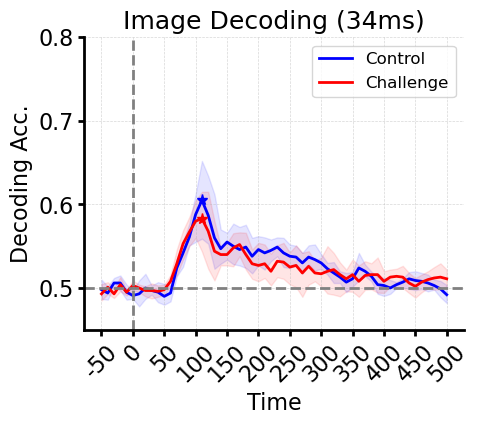

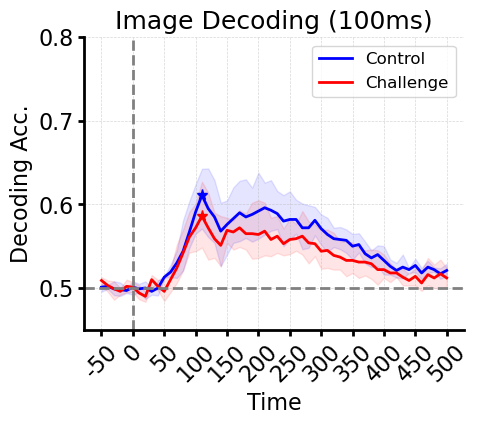

<Figure size 640x480 with 0 Axes>

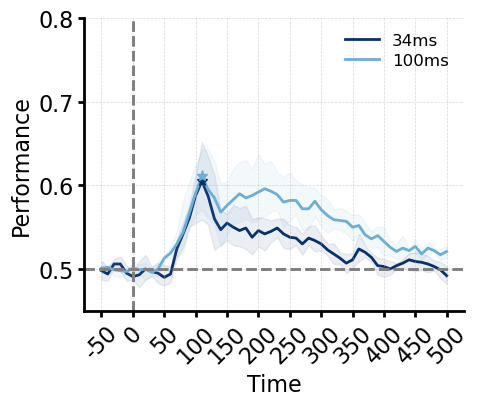

<Figure size 640x480 with 0 Axes>

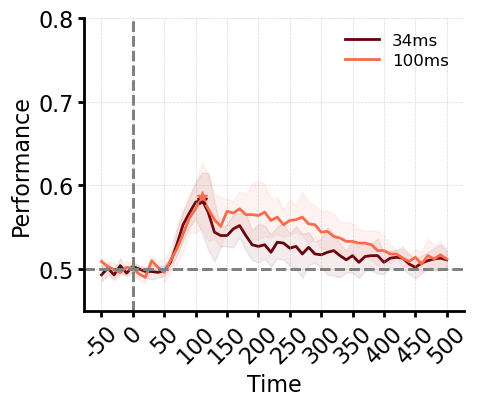

In [17]:

def plot_img_bycond():
    
    durations = ['2', '6']
    durations_lab = ['34ms', '100ms']
    x_fill = np.arange(len(boot_mean_con['2']))
    marker_size = 8
    
    for dur_idx,dur in enumerate(durations):
        
        plt.figure(figsize=(4.9,3.8))
        plt.plot(boot_mean_con[dur], '-b', label='Control')
        plt.plot(avg_height_lat['con'][dur_idx][1], avg_height_lat['con'][dur_idx][0], marker='*', markersize= marker_size, color='b')
        plt.fill_between(x_fill, y1=boot_CI_con[dur][:,0], y2=boot_CI_con[dur][:,1], color='blue', alpha=.1)
        plt.plot(boot_mean_chal[dur], '-r', label='Challenge')
        plt.plot(avg_height_lat['chal'][dur_idx][1], avg_height_lat['chal'][dur_idx][0], marker='*', markersize= marker_size, color='r')
        plt.fill_between(x_fill, boot_CI_chal[dur][:,0], boot_CI_chal[dur][:,1], color= 'red', alpha=0.1)
        plt.ylim(.45, .8)
        
        # Add lines
        plt.axvline(x=5, color='gray', linestyle='--')
        plt.axhline(y=0.5, color='gray', linestyle='--')

        plt.xlabel('Time')
        plt.ylabel('Decoding Acc.')
        plt.title('Image Decoding (' + durations_lab[dur_idx] +')')
        plt.xticks(np.linspace(0, 55, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'], rotation=45)
        plt.legend(loc='upper right')
        
        plt.show()
        
        
def plot_img_byduration(): 
    
    labels = ['Control', 'Challenge']
    durations = ['2', '6']
    durations_lab = ['34ms', '100ms']
    x_fill = np.arange(len(boot_mean_con['2']))
    # palette = sns.color_palette("tab10", len(durations))
    # palette_con = sns.color_palette("Blues", len(durations)+1)[::-1] 
    # palette_chal = sns.color_palette("Reds", len(durations)+1)[::-1] 
    palette_chal = [[103/255,0/255,13/255],[251/255,106/255,74/255]] #[203/255,24/255,29/255], [251/255,106/255,74/255], [252/255,187/255,161/255]]
    palette_con = [[8/255,48/255,107/255],[107/255,174/255,214/255]] #[33/255,113/255,181/255], [107/255,174/255,214/255], [198/255,209/255,239/255]]
    # palette_chal = ['#C72234','#EF5E25', '#EAB617']
    # palette_con = ['#3B1EEB','#237CF0', '#22C7C7']

    marker_size = 8
        
        
    # cond 0 = Control
    # cond 1 = Challenge
        
    # plot control
    plt.figure()
    plt.subplots(1,figsize=(4.9,3.8))
    for dur_idx, dur in enumerate(durations):

        plt.plot(boot_mean_con[dur], '-', label=str(durations_lab[dur_idx]), color=palette_con[dur_idx], zorder=1)
        plt.plot(avg_height_lat['con'][dur_idx][1], avg_height_lat['con'][dur_idx][0], marker='*', markersize= marker_size, color=palette_con[dur_idx], zorder=2)
        plt.fill_between(x_fill, y1=boot_CI_con[dur][:,0], y2=boot_CI_con[dur][:,1], alpha=.08,  color=palette_con[dur_idx])

        # Add lines (inside the loop for each subplot)
        plt.axvline(x=5, color='gray', linestyle='--')
        plt.axhline(y=0.5, color='gray', linestyle='--')
        plt.xticks(np.linspace(0, 55, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'], rotation=45)
        #ax[cond].set_xticks(np.linspace(0, 110, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'])

        plt.xlabel('Time')
        plt.ylabel('Performance')
        plt.tick_params(axis='y')
        plt.ylim(.45,.8)
        # plt.title('Image Decoding (Challenge)')  # Display the condition name
        plt.legend(loc='upper right', frameon=False, labelspacing=.3)
 # Adjust layout to prevent overlapping
    plt.show()
        
    
    # plot challenge
    
    plt.figure()
    plt.subplots(1,figsize=(4.9,3.8))
    for dur_idx, dur in enumerate(durations):
        plt.plot(boot_mean_chal[dur], '-', linewidth=2, label=str(durations_lab[dur_idx]), color=palette_chal[dur_idx], zorder=1)
        plt.plot(avg_height_lat['chal'][dur_idx][1], avg_height_lat['chal'][dur_idx][0], marker='*', markersize= marker_size, color=palette_chal[dur_idx], zorder=2)
        plt.fill_between(x_fill, y1=boot_CI_chal[dur][:,0], y2=boot_CI_chal[dur][:,1], alpha=.08, color=palette_chal[dur_idx])

        # Add lines (inside the loop for each subplot)
        plt.axvline(x=5, color='gray', linestyle='--')
        plt.axhline(y=0.5, color='gray', linestyle='--')
        plt.xticks(np.linspace(0, 55, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'], rotation=45)
        #ax[cond].set_xticks(np.linspace(0, 110, num=12),['-50','0','50','100','150','200','250','300','350','400','450','500'])

        plt.xlabel('Time')
        plt.ylabel('Performance')
        plt.tick_params(axis='y')
        plt.ylim(.45,.8)
        # plt.title('Image Decoding (Challenge)')  # Display the condition name
        plt.legend(loc='upper right', frameon=False, labelspacing=.3)

  # Adjust layout to prevent overlapping
    plt.show()
    

plot_img_bycond()
plot_img_byduration()